# Smart Home Energy Management System (SHEMS)

### Aim
   **- SHEMS aims to predict monthly electricity bills, monitor real-time device usage, optimize energy consumption patterns, detect abnormal consumption trends, and provide visual insights for informed decision-making in residential settings.** 



### Input

1. **Consumption Data:**
   - CSV file containing time intervals, dates, months, total consumption, and device-wise   consumption data.
   

2. **Monthly Bill Data:**
   - CSV file containing month, total consumption in kWh, and monthly bill amount in INR.
   

3. **Device Location Data:**
   - CSV file containing device ID, device name, and room location.
   

### Output

1. **Predicted Monthly Bill:**
   - Future monthly electricity bill (INR) prediction based on historical data and current timestamp.
   

2. **Live Device Readings:**
   - Table of live energy consumption readings for each device in each room.
   

3. **Energy Consumption Analysis:**
   - Recommendations for optimizing usage of high-energy devices.
   - Visualization of total consumption and percentage consumption during off-peak vs other hours.
   

4. **Abnormal Consumption Detection:**
   - List of devices with increasing consumption trends over the last 5 months.
   - Recommendations for inspection or replacement of these devices.

In [1]:
!pip install tensorflow

**Step 1: Load Datasets**


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

consumption_df = pd.read_csv('consumption_data.csv')
monthly_bill_df = pd.read_csv('monthly_bill_data.csv')
device_location_df = pd.read_csv('device_location_data.csv')

print ("\nCONSUMPTION TABLE")
print (consumption_df.head)
print ("\nMONTHLY BILL TABLE")
print (monthly_bill_df.head)
print ("\nDEVICE LOCATION TABLE")
print (device_location_df.head)

C:\Users\sidsu\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)



CONSUMPTION TABLE
<bound method NDFrame.head of     Time Interval        Date  Month  Total Consumption (kWh)  \
0          Normal    2/1/2023      1                    14.35   
1            Peak    2/1/2023      1                     5.21   
2        Off-peak    2/1/2023      1                    16.16   
3          Normal    2/3/2023      1                    19.86   
4            Peak    2/3/2023      1                    16.17   
..            ...         ...    ...                      ...   
295          Peak  11/24/2023     10                    14.31   
296      Off-peak  11/24/2023     10                    15.00   
297        Normal  11/27/2023     10                    12.05   
298          Peak  11/27/2023     10                    13.73   
299      Off-peak  11/27/2023     10                     9.81   

     Device 1 Consumption (kWh)  Device 2 Consumption (kWh)  \
0                          3.61                        1.18   
1                          1.46             

**Step 2: LSTM Model for Monthly Bill Prediction**

In [3]:
seq_length = 3  # Sequence length for LSTM

# Extract relevant columns from monthly bill data
bill_values = monthly_bill_df['Monthly Bill (INR)'].values.reshape(-1, 1)

# Scale the bill values
scaler_bill = MinMaxScaler(feature_range=(0, 1))
scaled_bill = scaler_bill.fit_transform(bill_values)


def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(scaled_bill, seq_length)
X = X.reshape(X.shape[0], seq_length, 1)


In [4]:
# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, shuffle=False)

# Evaluate the model
train_loss = model.evaluate(X, y, verbose=0)
accuracy = (1 - train_loss) * 100  # Calculate accuracy as percentage



Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4688
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4601
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4515
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4431
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4349
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4268
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4187
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4107
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4028
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3949
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3871
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3793
Epoch 13/100
1/1 [==============================] - 0s 5ms/ste

In [5]:
print(f'Accuracy: {accuracy:.2f}%')
print(f'Train Loss: {train_loss}')

Accuracy: 90.48%
Train Loss: 0.09524410218000412


**Step 3: Predict Monthly Bill Amount**


In [6]:
# Get current timestamp
current_time = datetime.datetime.now()

# Determine peak, normal, or off-peak based on current timestamp
hour = current_time.hour
if 14 <= hour < 22:
    timestamp = 'Peak'
elif 6 <= hour < 14:
    timestamp = 'Normal'
else:
    timestamp = 'Off-peak'


In [7]:

rooms = device_location_df['Room'].unique()

# Generate simulated readings for each device in each room (actual readings will replace simulated ones when the model operates live)
random_readings = pd.DataFrame(columns=['Room', 'Device', 'Live Reading'])
for room in rooms:
    devices_in_room = device_location_df[device_location_df['Room'] == room]['Device Name'].unique()
    for device in devices_in_room:
        reading = np.random.rand() * 10  # Generating a single random reading per device
        random_readings = random_readings.append({'Room': room, 'Device': device, 'Live Reading': reading}, ignore_index=True)


print(f'\nCurrent Timestamp: {current_time}')
print("\nLive Readings:")
print(random_readings[['Room', 'Device', 'Live Reading']].sort_values(by='Room').reset_index(drop=True))



Current Timestamp: 2024-06-30 13:12:54.752705

Live Readings:
            Room           Device  Live Reading
0      Bedroom 1           Heater      5.990238
1      Bedroom 1              Fan      8.423744
2      Bedroom 1         Computer      8.766388
3      Bedroom 2     Air Purifier      3.259932
4      Bedroom 2              Fan      6.257166
5      Bedroom 2             Lamp      4.209599
6         Garage       EV Charger      4.184535
7        Kitchen     Refrigerator      3.039308
8        Kitchen        Microwave      7.752966
9        Kitchen       Dishwasher      3.917857
10       Kitchen            Mixer      4.804588
11  Laundry Room  Washing Machine      2.743781
12  Laundry Room            Dryer      6.311484
13   Living Room  Air Conditioner      2.922285
14   Living Room       Television      5.605896
15   Living Room             Lamp      5.275105


In [8]:
# Predict next month's bill based on LSTM model
last_sequence = scaled_bill[-seq_length:].reshape(1, seq_length, 1)
predicted_scaled_bill = model.predict(last_sequence)
predicted_bill = scaler_bill.inverse_transform(predicted_scaled_bill)
predicted_monthly_bill = predicted_bill[0][0]

# Calculate bill amount based on timestamp
if timestamp == 'Peak':
    bill_amount = predicted_monthly_bill * 1.2  # 20% higher during peak hours
elif timestamp == 'Off-peak':
    bill_amount = predicted_monthly_bill * 0.8  # 20% lower during off-peak hours
else:
    bill_amount = predicted_monthly_bill  # Normal billing amount



1/1 [==============================] - 0s 188ms/step


In [9]:
import matplotlib.pyplot as plt

# Extract previous bills and predicted bill_amount
previous_bills = monthly_bill_df['Monthly Bill (INR)'].values
predicted_bill = bill_amount  # Assuming 'bill_amount' contains the predicted monthly bill


months = range(1, len(previous_bills) + 1)

print(f'Predicted Monthly Bill (INR) based on {timestamp}: {bill_amount:.2f}')


plt.figure(figsize=(10, 6))
plt.plot(months, previous_bills, marker='o', linestyle='-', color='blue', label='Previous Bills')
plt.plot(len(previous_bills) + 1, predicted_bill, marker='o', markersize=12, linestyle='-', color='red', label='Predicted Bill')
plt.title('Comparison of Predicted Monthly Bill with Previous Bills')
plt.xlabel('Month')
plt.ylabel('Monthly Bill (INR)')
plt.xticks(list(months) + [len(previous_bills) + 1], list(months) + ['Predicted'])
plt.legend()
plt.grid(True)
plt.show()


Predicted Monthly Bill (INR) based on Normal: 1646.21


<Figure size 1000x600 with 1 Axes>

**Step 4: Device Consumption Analysis**

- Analysis for specific devices (off-peak hours vs other hours)


In [10]:
device_names_to_find = ['EV Charger', 'Washing Machine']

# Filter device_location_df to find the device IDs and names
device_info = device_location_df[device_location_df['Device Name'].isin(device_names_to_find)][['Device ID', 'Device Name']]

# Extract device IDs and names
device_ids = device_info['Device ID'].tolist()
device_names = device_info['Device Name'].tolist()


total_peak_consumption = 0
total_normal_consumption = 0
total_off_peak_consumption = 0


peak_consumptions = []
normal_consumptions = []
off_peak_consumptions = []


devices_with_recommendation = []

# Iterate over each device ID
for device_id, device_name in zip(device_ids, device_names):

    device_column = f'Device {device_id} Consumption (kWh)'
    
    # Calculate total consumption for each time category
    peak_consumption = consumption_df[consumption_df['Time Interval'] == 'Peak'][device_column].sum()
    normal_consumption = consumption_df[consumption_df['Time Interval'] == 'Normal'][device_column].sum()
    off_peak_consumption = consumption_df[consumption_df['Time Interval'] == 'Off-peak'][device_column].sum()
    

    total_peak_consumption += peak_consumption
    total_normal_consumption += normal_consumption
    total_off_peak_consumption += off_peak_consumption
    

    peak_consumptions.append(peak_consumption)
    normal_consumptions.append(normal_consumption)
    off_peak_consumptions.append(off_peak_consumption)
    
    # Calculate the threshold for recommendation
    total_normal_threshold = 0.3 * total_normal_consumption
    
    # Provide recommendation based on consumption pattern
    if (peak_consumption + normal_consumption) > total_normal_threshold:
        devices_with_recommendation.append((device_id, device_name, peak_consumption, normal_consumption, off_peak_consumption))


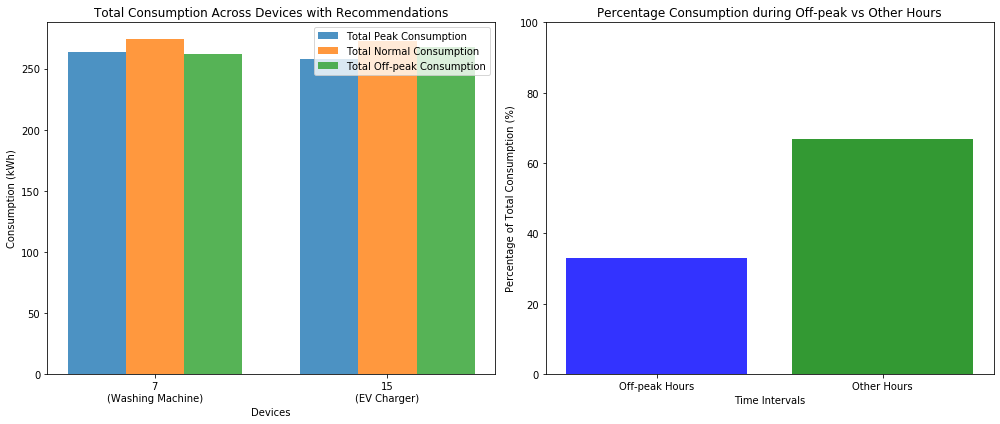

Device ID 7: Washing Machine
Total Peak Consumption: 263.2799999999999 kWh
Total Normal Consumption: 274.09 kWh
Total Off-peak Consumption: 261.77 kWh
Recommendation: Consider using Device ID 7 (Washing Machine) during Off-peak hours to save electricity costs.
-----------------------------------------


Device ID 15: EV Charger
Total Peak Consumption: 258.21 kWh
Total Normal Consumption: 272.7200000000001 kWh
Total Off-peak Consumption: 267.43 kWh
Recommendation: Consider using Device ID 15 (EV Charger) during Off-peak hours to save electricity costs.
-----------------------------------------




In [11]:
# Plot histogram for total consumption across devices with recommendations
if devices_with_recommendation:
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Total Consumption
    plt.subplot(1, 2, 1)
    bar_width = 0.25
    index = range(len(devices_with_recommendation))
    
    peak_values = [item[2] for item in devices_with_recommendation]
    normal_values = [item[3] for item in devices_with_recommendation]
    off_peak_values = [item[4] for item in devices_with_recommendation]
    device_labels = [f'{item[0]}\n({item[1]})' for item in devices_with_recommendation]
    
    plt.bar(index, peak_values, bar_width, label='Total Peak Consumption', alpha=0.8)
    plt.bar([i + bar_width for i in index], normal_values, bar_width, label='Total Normal Consumption', alpha=0.8)
    plt.bar([i + 2 * bar_width for i in index], off_peak_values, bar_width, label='Total Off-peak Consumption', alpha=0.8)

    plt.xlabel('Devices')
    plt.ylabel('Consumption (kWh)')
    plt.title('Total Consumption Across Devices with Recommendations')
    plt.xticks([i + bar_width for i in index], device_labels)
    plt.legend()
    
    # Plot 2: Percentage Consumption during Off-peak vs Other Hours
    plt.subplot(1, 2, 2)
    total_other_hours = total_peak_consumption + total_normal_consumption
    total_off_peak_percent = (total_off_peak_consumption / (total_peak_consumption + total_normal_consumption + total_off_peak_consumption)) * 100
    total_other_hours_percent = 100 - total_off_peak_percent
    
    plt.bar(['Off-peak Hours', 'Other Hours'], [total_off_peak_percent, total_other_hours_percent], alpha=0.8, color=['blue', 'green'])
    plt.xlabel('Time Intervals')
    plt.ylabel('Percentage of Total Consumption (%)')
    plt.title('Percentage Consumption during Off-peak vs Other Hours')
    plt.ylim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Print individual device-specific analysis and recommendations
for device_id, device_name, peak_consumption, normal_consumption, off_peak_consumption in devices_with_recommendation:
    print(f"Device ID {device_id}: {device_name}")
    print(f"Total Peak Consumption: {peak_consumption} kWh")
    print(f"Total Normal Consumption: {normal_consumption} kWh")
    print(f"Total Off-peak Consumption: {off_peak_consumption} kWh")
    print(f"Recommendation: Consider using Device ID {device_id} ({device_name}) during Off-peak hours to save electricity costs.")
    print("-----------------------------------------\n\n")


**Step 7: Detect Abnormal Consumption Trends**
- Detect Devices with Increasing Consumption Trends

In [12]:
abnormal_devices = []
abnormal_device_locations = {}


device_columns = [col for col in consumption_df.columns if col.startswith('Device ') and 'Consumption' in col]

for device_column in device_columns:
    device_id = int(device_column.split()[1])  # Extract device ID from column name
    
    # Calculate monthly consumption trend over the past 5 months
    monthly_consumption = consumption_df.groupby('Month')[device_column].sum().tail(5)
    
    # Check if consumption is increasing consistently over the past 5 months
    increasing_trend = True
    for i in range(1, len(monthly_consumption)):
        if monthly_consumption.iloc[i] <= monthly_consumption.iloc[i - 1]:
            increasing_trend = False
            break
    
    # If abnormal trend detected, store device ID
    if increasing_trend:
        abnormal_devices.append(device_id)

# Match abnormal device IDs with their locations and names
for device_id in abnormal_devices:
    device_info = device_location_df[device_location_df['Device ID'] == device_id]
    if not device_info.empty:
        location = device_info['Room'].values[0]
        device_name = device_info['Device Name'].values[0]
        if location not in abnormal_device_locations:
            abnormal_device_locations[location] = []
        abnormal_device_locations[location].append((device_id, device_name))


Abnormal Devices with Increasing Consumption Trends:

Room: Living Room
Device ID: 3, Device Name: Lamp


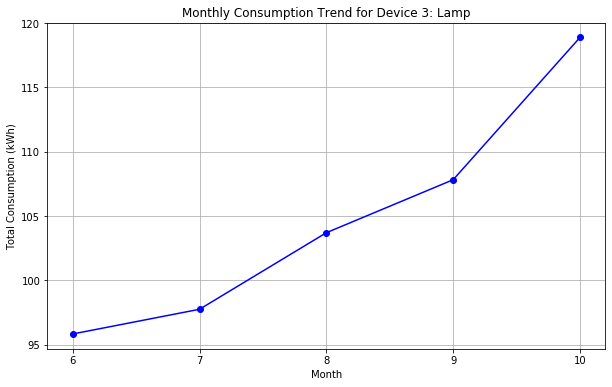


Room: Kitchen
Device ID: 16, Device Name: Mixer


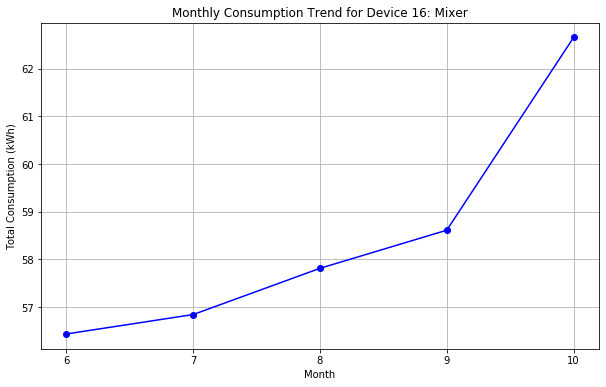

The following devices in each room are showing an increasing consumption rate over the last 5 months. It's recommended to consider repair or replacement of these devices:

Room: Living Room
- Device ID: 3, Device Name: Lamp

Room: Kitchen
- Device ID: 16, Device Name: Mixer


In [13]:
# Display abnormal devices grouped by rooms
print("Abnormal Devices with Increasing Consumption Trends:")
for room, devices in abnormal_device_locations.items():
    print(f"\nRoom: {room}")
    for device_id, device_name in devices:
        print(f"Device ID: {device_id}, Device Name: {device_name}")
        
        # Plot monthly consumption trend
        monthly_consumption = consumption_df.groupby('Month')[f'Device {device_id} Consumption (kWh)'].sum().tail(5)
        
        months = monthly_consumption.index.to_numpy()
        consumption_values = monthly_consumption.values
        
        plt.figure(figsize=(10, 6))
        plt.plot(months, consumption_values, marker='o', linestyle='-', color='b')
        plt.title(f"Monthly Consumption Trend for Device {device_id}: {device_name}")
        plt.xlabel('Month')
        plt.ylabel('Total Consumption (kWh)')
        plt.grid(True)
        plt.xticks(months)
        plt.show()
        
# Print recommendation for abnormal devices
print("The following devices in each room are showing an increasing consumption rate over the last 5 months. It's recommended to consider repair or replacement of these devices:")
for room, devices in abnormal_device_locations.items():
        print(f"\nRoom: {room}")
        for device_id, device_name in devices:
            print(f"- Device ID: {device_id}, Device Name: {device_name}")


**RESULT**

*Following implementation, SHEMS successfully predicts monthly electricity bills using LSTM models, monitors real-time device consumption with live readings, analyzes and optimizes usage patterns to reduce costs, detects abnormal consumption trends for proactive maintenance, and visualizes energy data effectively. These outcomes aim to significantly improve energy efficiency and promote sustainable practices in residential settings.*

**FUTURE SCOPE**

**1) Automated Device Tracking:**
*Integrate RFID or Bluetooth Low Energy (BLE) tags with devices and room identifiers. Use sensors to automatically detect device movement and update the device-location table accordingly in real-time.*

**2) Detection of Current Leakage:**
*Implement live sensors to identify residual energy consumption from devices that are actually off but still drawing current. Alert users promptly about potential leakage issues, facilitating proactive maintenance to prevent energy wastage and promote efficient usage.*

**3) Integration with Smart Home Systems:**
*Integrate SHEMS with existing smart home systems (e.g., Google Home, Amazon Alexa) or home automation platforms. Utilize these systems' capabilities to track and manage device locations seamlessly.*